In [8]:
# stack trace handler manipulates stack traces.
# It cleans stack traces from unecessary informations
# and finds the sequence of files.
# Stores the information on the filenames_dict

In [1]:
import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#initialize the dictionary and the path to find the stack traces
dir_path       = '../data1'
filenames_dict = {}
tags_list      = []

In [3]:
# remove text from the stack trace 
# and keep only the sequence of functions
# returns a list with the function calls
def clean_stack_trace(stack_trace):
    
    clean_stack_trace = []
    temp_stack = stack_trace.split(" at ")[1:]
    
    to_find = re.compile("[|,|<|>]|/|\|=")
    
    #find where each function ends and keep only the path
    for f in temp_stack:
        temp      = f.find(')')
        temp_file = f[0:temp]
        
        # check the punctuations in order to 
        # avoid anything else
        match_obj = to_find.search(temp_file)
        if match_obj == None:
            clean_stack_trace.append(find_filename(temp_file))
        
    return clean_stack_trace

In [4]:
# remove the name of the function and store only the file
# which contains the function.  
# This is done by tracking the full stop
def find_filename(value):
    filename = ""
    words    = value.split("(")
    if len(words)>=2:
        parts = words[0].split(".")
        filename = ".".join(parts[0:-1])
        
    return filename

In [5]:
# proceed for every file in the directory
stack_traces_counter = 0  

for fname in os.listdir(dir_path):
    with open(os.path.join(dir_path,fname)) as json_file:
        
        print("working on file",fname,"\n")
        
        #load data
        data = json.load(json_file)
        
        for counter,value in enumerate(data):
            dirty_stack_trace = value['stack_trace']
            
            if dirty_stack_trace != []:
                stack_traces_counter += 1
                temp_list=value['tags']
                for i in range(len(temp_list)):
                    temp_list[i] = temp_list[i].strip()
                tags_list.append(temp_list)
                
                print("working on stack trace on issue",counter+1,"\n")
                stack_trace = clean_stack_trace(dirty_stack_trace[0])
                
                for counter2,value2 in enumerate(stack_trace):
                    
                    filename = value2
                    
                    # in case filename is empty move on the next
                    if filename == "":
                        continue
                    
                    # if filename already in dict. just add the next file
                    if filename in filenames_dict:
                        
                        #find next file if exists
                        next_filename = ""
                        
                        if counter2+1<len(stack_trace):
                            next_filename = stack_trace[counter2+1]
                        
                        if next_filename != "":
                            exist_flag = False
                            
                            for count,i in enumerate(filenames_dict[filename]):
                                if next_filename == i["name"]:
                                    exist_flag = True
                                    location = "page"+fname[13:fname.find('.')]+"_issue"+str(counter+1)
                                    filenames_dict[filename][count]["occurance"] += 1
                                    if location not in filenames_dict[filename][count]["location"]:
                                        filenames_dict[filename][count]["location"].append(location)
                                    break
                                
                            if exist_flag == False:
                                location = "page"+fname[13:fname.find('.')]+"_issue"+str(counter+1)
                                filenames_dict[filename].append({"name":next_filename,"location":[location],"occurance":1})
                            
                    # if filename isnt in dict initialize it.
                    else:
                        
                        #find next file if exists
                        next_filename = ""
                        
                        if counter2+1<len(stack_trace):
                            next_filename = stack_trace[counter2+1]
                        
                        #store the filename in dict only if exists next file.
                        if next_filename != "":
                            location = "page"+fname[13:fname.find('.')]+"_issue"+str(counter+1)
                            filenames_dict[filename] = [{"name": next_filename,"location":[location],"occurance":1}]

working on file open_data_word_emb18.json 

working on file open_data_word_emb9.json 

working on file open_data_word_emb15.json 

working on file open_data_word_emb22.json 

working on stack trace on issue 10 

working on file open_data_word_emb17.json 

working on stack trace on issue 9 

working on file open_data_word_emb13.json 

working on file open_data_word_emb7.json 

working on stack trace on issue 20 

working on stack trace on issue 21 

working on file open_data_word_emb8.json 

working on file open_data_word_emb10.json 

working on stack trace on issue 11 

working on stack trace on issue 25 

working on file open_data_word_emb1.json 

working on stack trace on issue 20 

working on file open_data_word_emb14.json 

working on file open_data_word_emb19.json 

working on stack trace on issue 6 

working on file open_data_word_emb16.json 

working on file open_data_word_emb20.json 

working on file open_data_word_emb5.json 

working on stack trace on issue 10 

working on sta

In [6]:
# STATISTICS
# find the average of different connections for every file
# find maximum occurance frequency
# find number of different files
total_number  = 0
total_counter = 0
max_occur     = -1

for key in filenames_dict:
    total_counter      = total_counter + 1
    
    if len(filenames_dict[key]) > max_occur:
        max_occur = len(filenames_dict[key])
    
    total_number       = total_number + len(filenames_dict[key])

print("number of different files",total_counter)
print("the mean occurance rate is",total_number/total_counter)
print("maximum occurance frequensy",max_occur)
print("total number of stack traces",stack_traces_counter)

number of different files 170
the mean occurance rate is 1.588235294117647
maximum occurance frequensy 6
total number of stack traces 28


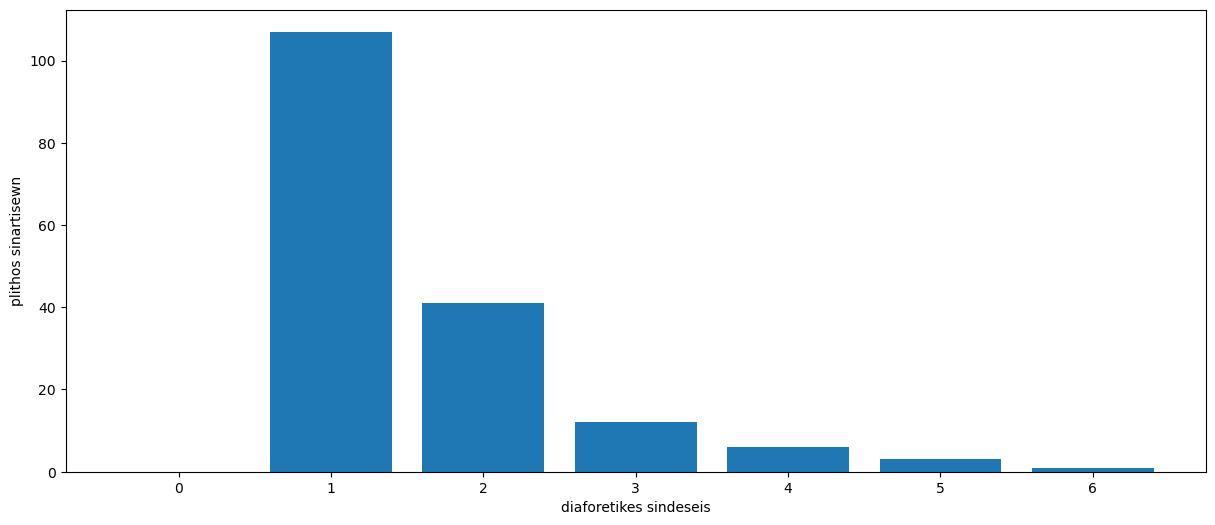

In [7]:
# create histogram with occurance rates

frequencies = np.zeros(max_occur+1)
freq_index  = [i for i in range(max_occur+1)]

for key in filenames_dict:
    
    freq = len(filenames_dict[key])
    frequencies[freq]  += 1
    
plt.figure(figsize=(50, 6))
plt_item = plt.subplot(132)
plt_item.bar(freq_index,frequencies)
plt_item.set_xticks(np.arange(len(freq_index)))
plt_item.set_xticklabels(freq_index)
plt.xlabel("diaforetikes sindeseis")
plt.ylabel("plithos sinartisewn")
plt.show()

In [8]:
# for debugging purposes print the connections and occurance rate for each file 
for key in filenames_dict:
    print("file:",key," connects")
    for connection in filenames_dict[key]:
        print(connection["name"],connection["occurance"],connection["location"])
    print("++++++++++++++++++++")

file: ch.boye.httpclientandroidlib.util.CharArrayBuffer  connects
ch.boye.httpclientandroidlib.util.CharArrayBuffer 1 ['paged_emb22_issue10']
android.support.v4.app.ActivityCompatHoneycomb 1 ['paged_emb22_issue10']
++++++++++++++++++++
file: android.support.v4.app.ActivityCompatHoneycomb  connects
cgeo.geocaching.network.Network 1 ['paged_emb22_issue10']
++++++++++++++++++++
file: cgeo.geocaching.network.Network  connects
cgeo.geocaching.network.Network 3 ['paged_emb22_issue10', 'paged_emb19_issue6']
cgeo.geocaching.connector.gc.Login 1 ['paged_emb22_issue10']
cgeo.geocaching.connector.trackable.GeokretyConnector 1 ['paged_emb19_issue6']
cgeo.geocaching.network.-$$Lambda$Network$HJwZsCLFMmiISrdxtajFdFJJscU 1 ['paged_emb5_issue25']
++++++++++++++++++++
file: cgeo.geocaching.connector.gc.Login  connects
cgeo.geocaching.connector.gc.Login 1 ['paged_emb22_issue10']
cgeo.geocaching.cgeo$firstLogin 1 ['paged_emb22_issue10']
++++++++++++++++++++
file: java.util.LinkedHashMap$LinkedHashIterato

In [9]:
# find stack traces per category
# additional label None used for issues which have stack trace but they dont have any tag.

tags_freq_dict = dict()
tags_freq_dict["None"] = 0
for tags in tags_list:
    if tags == []:
        tags_freq_dict["None"] += 1
    else:
        for tag in tags:
            if tag in tags_freq_dict:
                tags_freq_dict[tag] += 1
            else:
                tags_freq_dict[tag]  = 1


In [10]:
print(tags_freq_dict)

{'None': 0, 'Bug': 22, 'Google Play or Beta feedback': 10, 'CI server / Build tools': 4, 'Regression': 3, 'Refactoring': 2, 'Connector GK': 1, 'Regression SDK30/SAF': 2, 'Prio - Low': 1, 'Connector GC': 1, 'Unverified': 9, 'Feature Request': 2}
